# Forward propagation

* Utilizando Numpy definir una función para calcular la salida de los siguientes modelos
* Dado que cada sub-modelo "detecta" una característica intermedia h(variable latente) determinar para cada entrada la característica intermedia con mayor presencia.

<img src='modelos1.png'>

In [1]:
import numpy as np

In [2]:
# Definir función sigmoid a utilizar como activación para las neuronas
def sigmoid(X):
  return 1/(1+np.exp(-X))

In [27]:
class NeuralNet_with_bias:
    def __init__(self, w_1, w_2):
        self.w_1 = w_1
        self.w_2 = w_2
    
    def forward_propagation(self, X):
        X = np.append(X, 1)
        l1_a = sigmoid(np.matmul(X, self.w_1))
        l1_a_2 = np.append(l1_a, 1)
        output = sigmoid(np.matmul(l1_a_2, self.w_2))
        
        return output, l1_a

In [28]:
red2 = NeuralNet_with_bias(w_1 = np.array([[5,7],[-2,-3],[-8,1]]), w_2 = np.array([7,5,-6]))

In [29]:
red2.forward_propagation(X = np.array([1,1]))

(0.2715813356119339, array([0.00669285, 0.99330715]))

In [30]:
class NeuralNet:
    def __init__(self, w_1, w_2):
        self.w_1 = w_1
        self.w_2 = w_2
        
    def forward_propagation(self, X):
        l1_a = sigmoid(np.matmul(X, self.w_1))
        output = sigmoid(np.matmul(l1_a, self.w_2))
        
        return output, l1_a

In [31]:
red1 = NeuralNet(w_1 = np.array([[0.8, 0.4, 0.3],[0.2, 0.9, 0.5]]), w_2 = np.array([0.3, 0.5, 0.9]))

In [32]:
red1.forward_propagation(X = np.array([1,1]))

(0.7743802720529458, array([0.73105858, 0.78583498, 0.68997448]))

## Parte 2:

* Calcular para cada posible punto en el dominio de xor la salida intermedia H = [h1, h2]
* Mostrar la matriz resultante H en el notebook
* Graficar cada punto de la representación intermedia (scatter), usar diferente color y o marker según su etiqueta. Puesto que tiene 2 posibles valores, la gráfica debe tener 2 colores o markers.
* Analizar el resultado intermedio, concluir y comentar opiniones

<img src= 'modelos2.png'>


In [97]:
class NeuralNetXOR:
    def __init__(self):
        self.w_1 = np.array([[-10, 20, 20], [30, -20, -20]])
        self.w_2 = np.array([-30, 20, 20])
        
    def forward_propagation(self, X):
        X = np.append(np.ones((X.shape[0], 1)), X, axis = -1)
        l1_a = sigmoid(np.matmul(X, self.w_1.T))
        l1_a_2 = np.append(np.ones((l1_a.shape[0], 1)),l1_a, axis = -1)
        output = sigmoid(np.matmul(l1_a_2, self.w_2.T))
        
        return output, l1_a
        

In [98]:
model = NeuralNetXOR()

In [99]:
X_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])

In [100]:
outputs, hidden_layers = model.forward_propagation(X = np.array([[0,0], [0,1], [1,0], [1,1]]))

In [124]:
np.round(outputs).reshape(1,-1)

array([[0., 1., 1., 0.]])

In [131]:
hidden_layers[:,0]

array([4.53978687e-05, 9.99954602e-01, 9.99954602e-01, 1.00000000e+00])

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

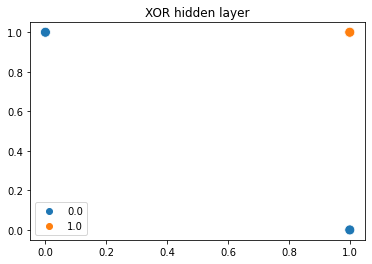

In [140]:
g = sns.scatterplot(hidden_layers[:,0], hidden_layers[:,1], hue = np.round(outputs), s = 100).set_title("XOR hidden layer")


## Conclusiones:

* Se puede observar, que con una red neuronal de 2 capas es posible crear un perceptron multicapa que aproxime la función XOR.
* La representación intermedia de la hidden layer muestra un espacio latente en el que las dos clases son linealmente separables. Esto permite que el perceptron multicapa logre asignar el resultado correcto a todas las posibles entradas de la función XOR. 
* Las multiplicaciones matriciales que ocurren entre los datos de entrada y los parámetros del modelo se pueden interpretar como transformaciones lineales que que generan espacios latentes más convenientes para resolver el problema necesario.